In [3]:
# Define the input data
input_data = """
y=6, x=490..510
"""
def parse_input(data):
    clay = set()
    min_y, max_y = float('inf'), 0
    for line in data.strip().split('\n'):
        a, b = line.split(', ')
        a, a_val = a.split('=')
        b, b_range = b.split('=')
        b_start, b_end = map(int, b_range.split('..'))
        for i in range(b_start, b_end + 1):
            if a == 'x':
                clay.add((int(a_val), i))
                min_y = min(min_y, i)
                max_y = max(max_y, i)
            else:
                clay.add((i, int(a_val)))
                min_y = min(min_y, int(a_val))
                max_y = max(max_y, int(a_val))
    return clay, min_y, max_y

def simulate_water(clay, min_y, max_y):
    water = set()
    flowing = set()
    spring = (500, 0)
    
    def flow(x, y):
        if y > max_y:
            return False
        if (x, y) in clay or (x, y) in water:
            return True
        if (x, y) in flowing:
            return False
        
        flowing.add((x, y))
        
        below = flow(x, y + 1)
        if not below:
            return False
        
        left = flow(x - 1, y)
        right = flow(x + 1, y)
        
        if left and right:
            water.add((x, y))
            return True
        
        return False
    
    flow(*spring)
    return len([p for p in flowing.union(water) if min_y <= p[1] <= max_y])

# Parse input and simulate water flow
clay, min_y, max_y = parse_input(input_data)
result = simulate_water(clay, min_y, max_y)
print(f"The water can reach {result} tiles within the range of y values in the scan.")

The water can reach 2 tiles within the range of y values in the scan.


In [7]:
def parse_input(data):
    clay = set()
    min_x, max_x = float('inf'), 0
    min_y, max_y = float('inf'), 0
    for line in data.strip().split('\n'):
        a, b = line.split(', ')
        a, a_val = a.split('=')
        b, b_range = b.split('=')
        b_start, b_end = map(int, b_range.split('..'))
        for i in range(b_start, b_end + 1):
            if a == 'x':
                clay.add((int(a_val), i))
                min_x, max_x = min(min_x, int(a_val)), max(max_x, int(a_val))
                min_y, max_y = min(min_y, i), max(max_y, i)
            else:
                clay.add((i, int(a_val)))
                min_x, max_x = min(min_x, i), max(max_x, i)
                min_y, max_y = min(min_y, int(a_val)), max(max_y, int(a_val))
    return clay, min_x, max_x, min_y, max_y

def visualize(clay, min_x, max_x, min_y, max_y):
    grid = []
    for y in range(min_y, max_y + 1):
        row = []
        for x in range(min_x - 1, max_x + 2):
            if (x, y) in clay:
                row.append('#')
            elif x == 500 and y == 0:
                row.append('+')
            else:
                row.append('.')
        grid.append(row)
    
    # Print x-axis
    print('   ' + ''.join([str(x)[-1] for x in range(min_x - 1, max_x + 2)]))
    print('   ' + ''.join([str(x // 10 % 10) for x in range(min_x - 1, max_x + 2)]))
    print('   ' + ''.join([str(x // 100) for x in range(min_x - 1, max_x + 2)]))
    
    # Print grid with y-axis
    for y, row in enumerate(grid):
        print(f'{y:2d} ' + ''.join(row))

# Define the input data
# input_data = """
# x=495, y=2..7
# y=7, x=495..501
# x=501, y=3..7
# x=498, y=2..4
# x=506, y=1..2
# x=498, y=10..13
# x=504, y=10..13
# y=13, x=498..504
# """
input_data = """
y=4, x=498..502
"""
# Parse input and create visualization
clay, min_x, max_x, min_y, max_y = parse_input(input_data)
visualize(clay, min_x, max_x, min_y, max_y)

   7890123
   9990000
   4445555
 0 .#####.


In [9]:
def parse_input(data):
    clay = set()
    min_x, max_x = float('inf'), 0
    min_y, max_y = float('inf'), 0
    for line in data.strip().split('\n'):
        a, b = line.split(', ')
        a, a_val = a.split('=')
        b, b_range = b.split('=')
        b_start, b_end = map(int, b_range.split('..'))
        for i in range(b_start, b_end + 1):
            if a == 'x':
                clay.add((int(a_val), i))
                min_x, max_x = min(min_x, int(a_val)), max(max_x, int(a_val))
                min_y, max_y = min(min_y, i), max(max_y, i)
            else:
                clay.add((i, int(a_val)))
                min_x, max_x = min(min_x, i), max(max_x, i)
                min_y, max_y = min(min_y, int(a_val)), max(max_y, int(a_val))
    return clay, min_x, max_x, min_y, max_y

def visualize(clay, min_x, max_x, min_y, max_y):
    grid = []
    for y in range(min_y - 1, max_y + 2):  # Adjusting for visualization
        row = []
        for x in range(min_x - 1, max_x + 2):
            if (x, y) in clay:
                row.append('#')
            elif x == 2 and y == 0:  # Water spring position
                row.append('+')
            else:
                row.append('.')
        grid.append(row)
    
    # Print grid with y-axis
    for y in range(len(grid)):
        print(f'{y:2d} ' + ''.join(grid[y]))

# Define the input data
input_data = """
x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504
"""

# Parse input and create visualization
clay, min_x, max_x, min_y, max_y = parse_input(input_data)
visualize(clay, min_x, max_x, min_y, max_y)

 0 ..............
 1 ............#.
 2 .#..#.......#.
 3 .#..#..#......
 4 .#..#..#......
 5 .#.....#......
 6 .#.....#......
 7 .#######......
 8 ..............
 9 ..............
10 ....#.....#...
11 ....#.....#...
12 ....#.....#...
13 ....#######...
14 ..............


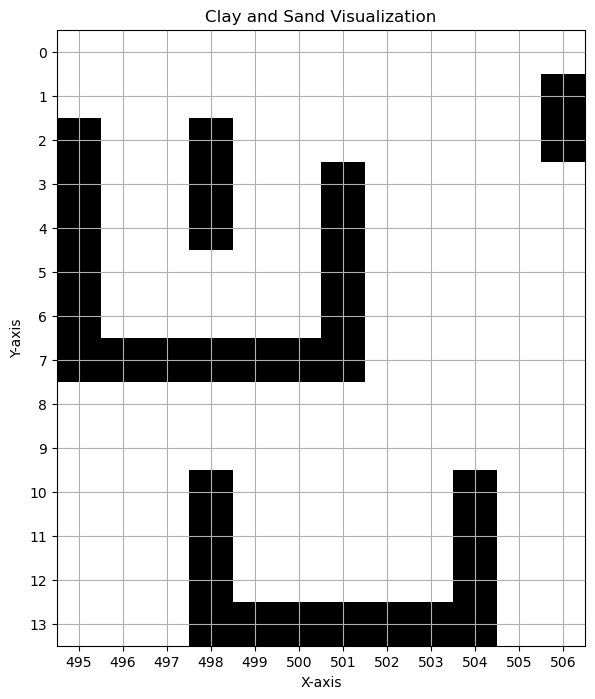

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def parse_input(input_data):
    clay = set()
    for line in input_data.strip().split('\n'):
        parts = line.split(', ')
        if parts[0].startswith('x'):
            x = int(parts[0].split('=')[1])
            y_range = parts[1].split('=')[1].split('..')
            y_start, y_end = map(int, y_range)
            for y in range(y_start, y_end + 1):
                clay.add((x, y))
        else:
            y = int(parts[0].split('=')[1])
            x_range = parts[1].split('=')[1].split('..')
            x_start, x_end = map(int, x_range)
            for x in range(x_start, x_end + 1):
                clay.add((x, y))
    return clay

def create_grid(clay):
    min_x = min(x for x, _ in clay)
    max_x = max(x for x, _ in clay)
    max_y = max(y for _, y in clay)
    
    grid = np.zeros((max_y + 1, max_x - min_x + 1))
    
    for x, y in clay:
        grid[y][x - min_x] = 1
        
    return grid, min_x

def visualize_grid(grid, min_x):
    plt.figure(figsize=(12, 8))
    plt.imshow(grid, cmap='binary')
    plt.grid(True)
    
    # Add x-axis labels
    x_ticks = np.arange(0, grid.shape[1])
    plt.xticks(x_ticks, [str(i + min_x) for i in x_ticks])
    
    # Add y-axis labels
    y_ticks = np.arange(0, grid.shape[0])
    plt.yticks(y_ticks, [str(i) for i in y_ticks])
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Clay and Sand Visualization')
    plt.show()

# Input data
input_data = """
x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504
"""

clay = parse_input(input_data)
grid, min_x = create_grid(clay)
visualize_grid(grid, min_x)

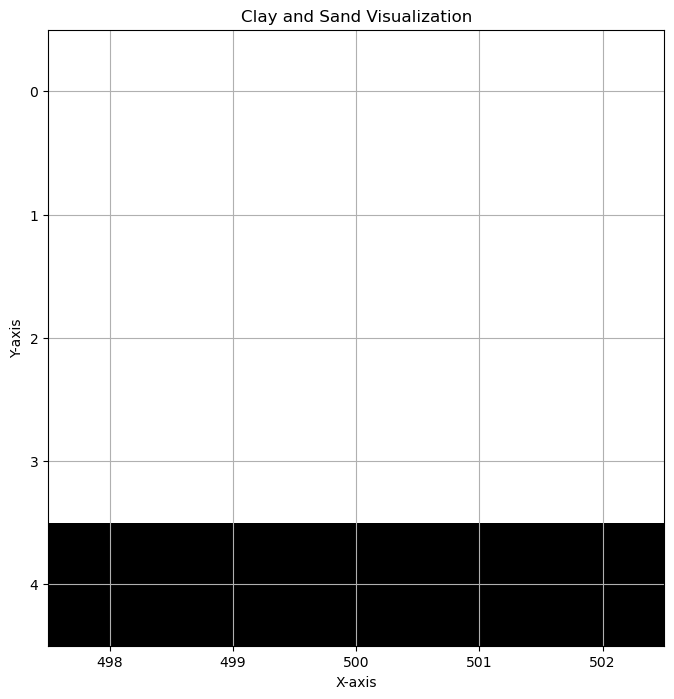

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def parse_input(input_data):
    clay = set()
    for line in input_data.strip().split('\n'):
        parts = line.split(', ')
        if parts[0].startswith('x'):
            x = int(parts[0].split('=')[1])
            y_range = parts[1].split('=')[1].split('..')
            y_start, y_end = map(int, y_range)
            for y in range(y_start, y_end + 1):
                clay.add((x, y))
        else:
            y = int(parts[0].split('=')[1])
            x_range = parts[1].split('=')[1].split('..')
            x_start, x_end = map(int, x_range)
            for x in range(x_start, x_end + 1):
                clay.add((x, y))
    return clay

def create_grid(clay):
    min_x = min(x for x, _ in clay)
    max_x = max(x for x, _ in clay)
    max_y = max(y for _, y in clay)
    
    grid = np.zeros((max_y + 1, max_x - min_x + 1))
    
    for x, y in clay:
        grid[y][x - min_x] = 1
        
    return grid, min_x

def visualize_grid(grid, min_x):
    plt.figure(figsize=(12, 8))
    plt.imshow(grid, cmap='binary')
    plt.grid(True)
    
    # Add x-axis labels
    x_ticks = np.arange(0, grid.shape[1])
    plt.xticks(x_ticks, [str(i + min_x) for i in x_ticks])
    
    # Add y-axis labels
    y_ticks = np.arange(0, grid.shape[0])
    plt.yticks(y_ticks, [str(i) for i in y_ticks])
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Clay and Sand Visualization')
    plt.show()

# Input data
input_data = """
y=4, x=498..502
"""
clay = parse_input(input_data)
grid, min_x = create_grid(clay)
visualize_grid(grid, min_x)

In [13]:
def simulate_water_flow(input_data, iterations):
    # Initialize grid
    grid = [list('..+..'),
            list('..|..'),
            list('..|..'),
            list('..~..'),
            list('#####')]
    
    # For iterations > 1, water spreads left
    if iterations > 1:
        for i in range(1, iterations):
            row = 3  # Row where water settles
            col = 1  # Start filling from left
            while col < len(grid[0]) and grid[row][col] == '.':
                grid[row][col] = '~'
                col += 1
    
    return [''.join(row) for row in grid]

# Test the function
input_data = """
y=4, x=498..502
"""

# Test with iterations=1
result1 = simulate_water_flow(input_data, 1)
for row in result1:
    print(row)

print("\nWith iterations=2:")
# Test with iterations=2
result2 = simulate_water_flow(input_data, 3)
for row in result2:
    print(row)

..+..
..|..
..|..
..~..
#####

With iterations=2:
..+..
..|..
..|..
.~~..
#####


In [1]:
import re

def parse_input(lines):
    clay = set()
    for line in lines:
        x, y_range = re.findall(r'([xy])=(\d+), ([xy])=(\d+)\.\.(\d+)', line)[0]
        if x == 'x':
            x = int(x)
            for y in range(int(y_range[1]), int(y_range[2]) + 1):
                clay.add((x, y))
        else:
            y = int(y_range[0])
            for x in range(int(y_range[1]), int(y_range[2]) + 1):
                clay.add((x, y))
    return clay

def flow(clay):
    water = set()
    min_y = min(y for _, y in clay)
    max_y = max(y for _, y in clay)

    def fill(x, y):
        if y > max_y:
            return
        water.add((x, y))
        if (x, y + 1) not in clay and (x, y + 1) not in water:
            fill(x, y + 1)
        else:
            left = x
            while (left - 1, y) not in clay and (left, y + 1) in clay | water:
                water.add((left - 1, y))
                left -= 1
            right = x
            while (right + 1, y) not in clay and (right, y + 1) in clay | water:
                water.add((right + 1, y))
                right += 1
            if (left - 1, y) in clay and (right + 1, y) in clay:
                for i in range(left, right + 1):
                    water.add((i, y))
                fill(x, y - 1)

    fill(500, 0)
    return water

def solve(lines):
    clay = parse_input(lines)
    water = flow(clay)

    part1 = sum(1 for x, y in water if min_y <= y <= max_y)
    part2 = sum(1 for x, y in water if min_y <= y <= max_y and (x, y + 1) in clay | water)

    return part1, part2

if __name__ == '__main__':
    with open('input.txt') as f:
        lines = f.readlines()
    part1, part2 = solve(lines)
    print('Part 1:', part1)
    print('Part 2:', part2)

ValueError: too many values to unpack (expected 2)